# Classificação de textos com spaCy

In [12]:
import pandas as pd
import string
import spacy
import random
import seaborn as srn
import numpy as np
from spacy.lang.pt.stop_words import STOP_WORDS

In [4]:
base_train = pd.read_csv('dados/base_treinamento.txt', encoding='utf-8')
print(base_train.shape)
base_train.head()

(196, 2)


,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [5]:
base_test = pd.read_csv('dados/base_teste.txt', encoding='utf-8')
print(base_test.shape)
base_test.head()

(84, 2)


,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


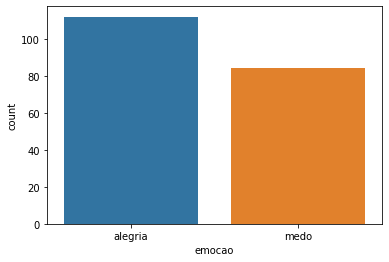

In [8]:
srn.countplot(x=base_train['emocao'], label='count');

## Pré-processamento dos textos

In [11]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
stop_words = STOP_WORDS
print(len(stop_words))
#stop_words

416


In [17]:
pln = spacy.load('pt_core_news_sm')
pln

In [19]:
teste = 'Estou aprendendo processamento de linguagem natural, online.'

In [36]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)
        
    # remover stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    # remover numeros e formar frase
    frase_processada = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
        
    return frase_processada

In [37]:
preprocessamento(teste)

'aprender processamento linguagem natural online'